In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
data_train = pd.read_csv('dataset/train.csv', index_col='Unnamed: 0')
data_train.head()

id  Gender      Customer Type  Age   Type of Travel     Class  \
0   70172    Male     Loyal Customer   13  Personal Travel  Eco Plus   
1    5047    Male  disloyal Customer   25  Business travel  Business   
2  110028  Female     Loyal Customer   26  Business travel  Business   
3   24026  Female     Loyal Customer   25  Business travel  Business   
4  119299    Male     Loyal Customer   61  Business travel  Business   

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0              460                      3                                  4   
1              235                      3                                  2   
2             1142                      2                                  2   
3              562                      2                                  5   
4              214                      3                                  3   

   Ease of Online booking  ...  Inflight entertainment  On-board service  \
0                       3  ...                       5                 4   
1                       3  ...                       1                 1   
2                       2  ...                       5                 4   
3                       5  ...                       2                 2   
4                       3  ...                       3                 3   

   Leg room service  Baggage handling  Checkin service  Inflight service  \
0                 3                 4                4                 5   
1                 5                 3                1                 4   
2                 3                 4                4                 4   
3                 5                 3                1                 4   
4                 4                 4                3                 3   

   Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  \
0            5                          25                      18.0   
1            1                           1                       6.0   
2            5                           0                       0.0   
3            2                          11                       9.0   
4            3                           0                       0.0   

              satisfaction  
0  neutral or dissatisfied  
1  neutral or dissatisfied  
2                satisfied  
3  neutral or dissatisfied  
4                satisfied  

[5 rows x 24 columns]


# Dataset description

This dataset contains an airline passenger satisfaction survey.

## Columns description

Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

# Identifikacia problemov

## Identifikacia NAN
V datasete sa chybajuce hodnoty nachadzaju iba v stlpci "Arrival Delay in Minutes". Konkretne tam chyba 310 hodnot.

In [6]:
data_train.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

## Categorical columns
There are five categorical columns. Concretely columns "Gender", "Customer Type", "Type of Travel", "Class" and "satisfaction".

In [122]:
for col in data_train.columns:
    if data_train[col].dtypes == 'object':
        print(f"{col}: {data_train[col].unique()}")

Gender: ['Male' 'Female']
Customer Type: ['Loyal Customer' 'disloyal Customer']
Type of Travel: ['Personal Travel' 'Business travel']
Class: ['Eco Plus' 'Business' 'Eco']
satisfaction: ['neutral or dissatisfied' 'satisfied']


### Description

In [123]:
data_train.describe(exclude=np.number)

Gender   Customer Type   Type of Travel     Class  \
count   103904          103904           103904    103904   
unique       2               2                2         3   
top     Female  Loyal Customer  Business travel  Business   
freq     52727           84923            71655     49665   

                   satisfaction  
count                    103904  
unique                        2  
top     neutral or dissatisfied  
freq                      58879

### Gender
Column "Gender" consists of two unique values "Female" and "Male". Number of rows with value "Female" is 52 727 and with value "Male" is 51 177. As we can see on graph below the ratio between them is almost balanced.

Number of females: 52727
Number of males: 51177


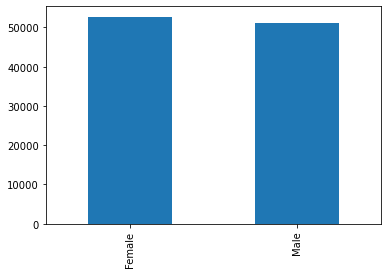

In [124]:
n_female = len(data_train[data_train["Gender"] == 'Female'])
n_male = len(data_train[data_train["Gender"] == 'Male'])

print(f"Number of females: {n_female}")
print(f"Number of males: {n_male}")

data_train["Gender"].value_counts().plot(kind='bar')

### Customer Type
Column "Customer Type" consists of two unique values "Loyal Customer" and "disloyal Customer" is 18 981. As we can see on the graph below, values are unbalanced.

Number of loyal customer: 84923
Number of disloyal customers: 18981


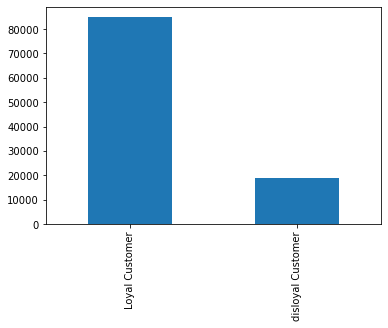

In [125]:
n_loyal = len(data_train[data_train["Customer Type"] == 'Loyal Customer'])
n_disloyal = len(data_train[data_train["Customer Type"] == 'disloyal Customer'])

print(f"Number of loyal customer: {n_loyal}")
print(f"Number of disloyal customers: {n_disloyal}")

data_train["Customer Type"].value_counts().plot(kind='bar')

### Type of Travel
Column "Type of Travel" consists of two unique values "Business travel" and "Personal Travel". Number of rows with value "Business travel" is 71 655 and with value "Personal Travel" is 32 249. As we can see on the graph below that values are unbalanced, but not much as column "Customer Type".

Number of business travels: 71655
Number of personal travel: 32249


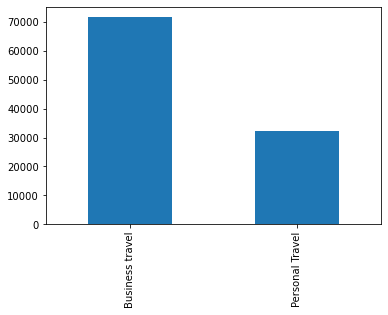

In [127]:
n_business = len(data_train[data_train["Type of Travel"] == 'Business travel'])
n_personal = len(data_train[data_train["Type of Travel"] == 'Personal Travel'])

print(f"Number of business travels: {n_business}")
print(f"Number of personal travel: {n_personal}")

data_train["Type of Travel"].value_counts().plot(kind='bar')

### Class
Column "Class" consists of three unique values "Business", "Eco" and "Eco Plus". Number of rows with value "Business" is 49 665, "Eco" is 46 745 and "Eco Plus" is 7 494. As we can see on the graph below, the values "Business" and "Eco" have fairy similar numbers of appearances, but the appearance for the value "Eco Plus" is much lower.

Number of business class: 49665
Number of eco class: 46745
Number of eco plus class: 7494


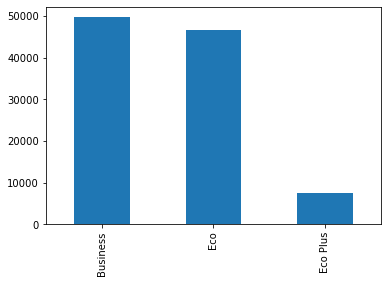

In [119]:
n_business = len(data_train[data_train["Class"] == 'Business'])
n_eco = len(data_train[data_train["Class"] == 'Eco'])
n_eco_plus = len(data_train[data_train["Class"] == 'Eco Plus'])

print(f"Number of business class: {n_business}")
print(f"Number of eco class: {n_eco}")
print(f"Number of eco plus class: {n_eco_plus}")

data_train["Class"].value_counts().plot(kind='bar')

### satisfaction
Column "satisfaction" consists of two unique values "neutral or dissatisfied" and "satisfied". Number of rows with value "neutral or dissatisfied" is 58 879, "satisfied" is 45 025.

Number of neutral or dissatisfied: 58879
Number of satisfied: 45025


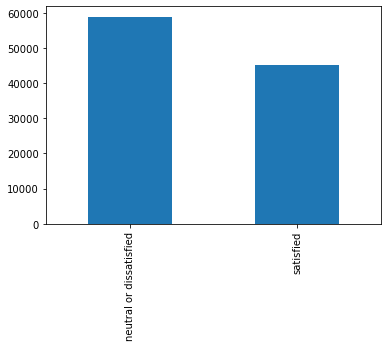

In [128]:
n_dissatisfied = len(data_train[data_train["satisfaction"] == 'neutral or dissatisfied'])
n_satisfied = len(data_train[data_train["satisfaction"] == 'satisfied'])

print(f"Number of neutral or dissatisfied: {n_dissatisfied}")
print(f"Number of satisfied: {n_satisfied}")

data_train["satisfaction"].value_counts().plot(kind='bar')

## Ordinal columns

In [113]:
jano = data_train[colll]
jano.astype(object).describe()

Inflight wifi service  Departure/Arrival time convenient  \
count                  103904                             103904   
unique                      6                                  6   
top                         3                                  4   
freq                    25868                              25546   

        Ease of Online booking  Gate location  Food and drink  \
count                   103904         103904          103904   
unique                       6              6               6   
top                          3              3               4   
freq                     24449          28577           24359   

        Online boarding  Seat comfort  Inflight entertainment  \
count            103904        103904                  103904   
unique                6             6                       6   
top                   4             4                       4   
freq              30762         31765                   29423   

        On-board service  Leg room service  Baggage handling  Checkin service  \
count             103904            103904            103904           103904   
unique                 6                 6                 5                6   
top                    4                 4                 4                4   
freq               30867             28789             37383            29055   

        Inflight service  Cleanliness  
count             103904       103904  
unique                 6            6  
top                    4            4  
freq               37945        27179

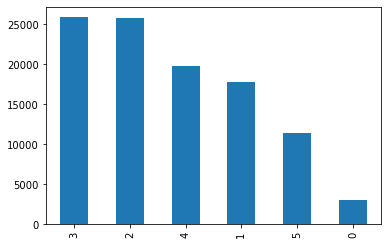

In [49]:
data_train["Inflight wifi service"].value_counts().plot(kind='bar')

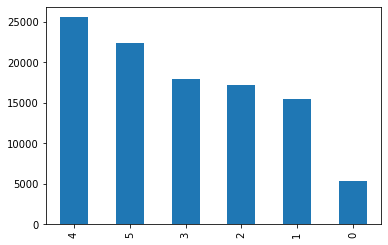

In [50]:
data_train["Departure/Arrival time convenient"].value_counts().plot(kind='bar')

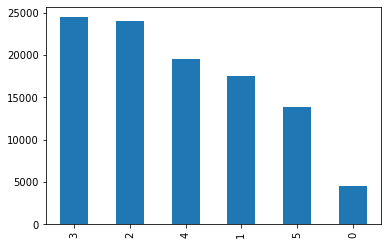

In [51]:
data_train["Ease of Online booking"].value_counts().plot(kind='bar')

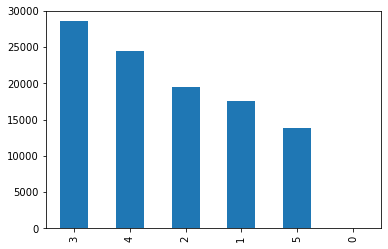

In [53]:
data_train["Gate location"].value_counts().plot(kind='bar')

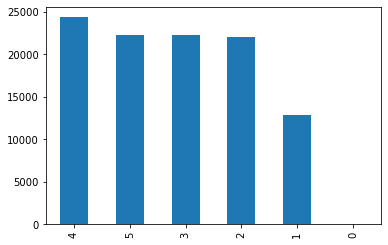

In [54]:
data_train["Food and drink"].value_counts().plot(kind='bar')

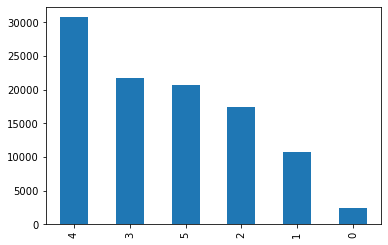

In [55]:
data_train["Online boarding"].value_counts().plot(kind='bar')

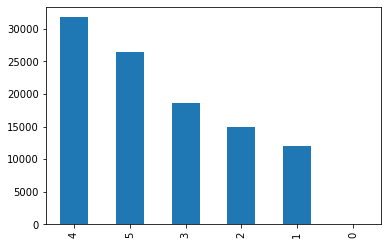

In [56]:
data_train["Seat comfort"].value_counts().plot(kind='bar')

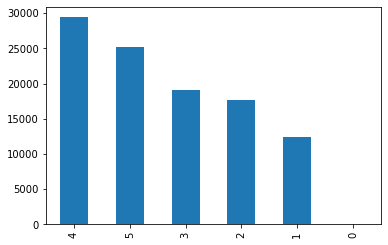

In [57]:
data_train["Inflight entertainment"].value_counts().plot(kind='bar')

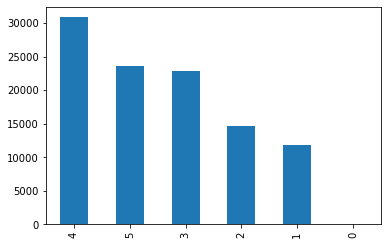

In [58]:
data_train["On-board service"].value_counts().plot(kind='bar')

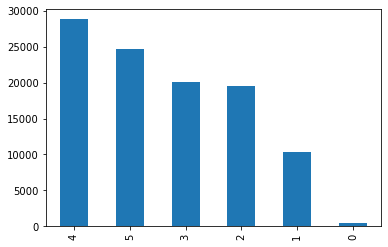

In [59]:
data_train["Leg room service"].value_counts().plot(kind='bar')

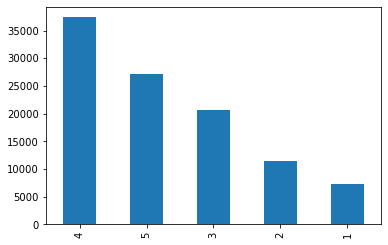

In [60]:
data_train["Baggage handling"].value_counts().plot(kind='bar')

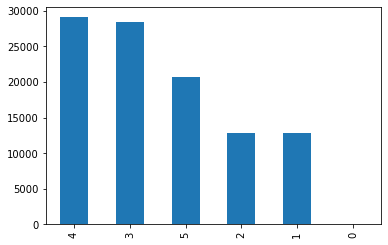

In [70]:
data_train["Checkin service"].value_counts().plot(kind='bar')

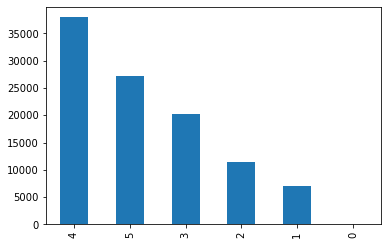

In [71]:
data_train["Inflight service"].value_counts().plot(kind='bar')

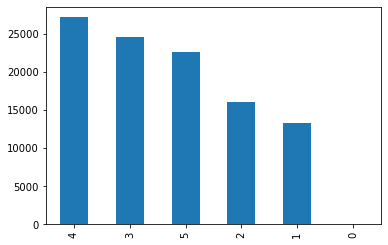

In [74]:
data_train["Cleanliness"].value_counts().plot(kind='bar')

In [115]:
data_train[continuous_cols].describe()

id            Age  Flight Distance  \
count  103904.000000  103904.000000    103904.000000   
mean    64924.210502      39.379706      1189.448375   
std     37463.812252      15.114964       997.147281   
min         1.000000       7.000000        31.000000   
25%     32533.750000      27.000000       414.000000   
50%     64856.500000      40.000000       843.000000   
75%     97368.250000      51.000000      1743.000000   
max    129880.000000      85.000000      4983.000000   

       Departure Delay in Minutes  Arrival Delay in Minutes  
count               103904.000000             103594.000000  
mean                    14.815618                 15.178678  
std                     38.230901                 38.698682  
min                      0.000000                  0.000000  
25%                      0.000000                  0.000000  
50%                      0.000000                  0.000000  
75%                     12.000000                 13.000000  
max                   1592.000000               1584.000000

## Column "Age"

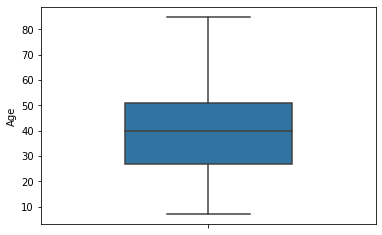

In [37]:
sns.boxplot(y=data_train['Age'], width=0.5)

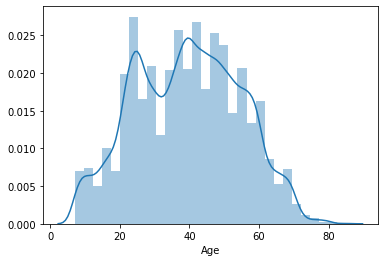

In [41]:
sns.distplot(data_train["Age"], bins=30)

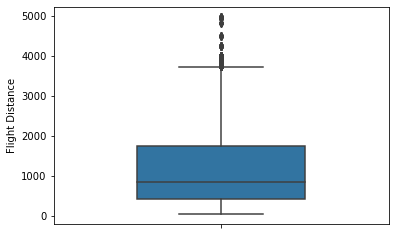

In [38]:
sns.boxplot(y=data_train['Flight Distance'], width=0.5)

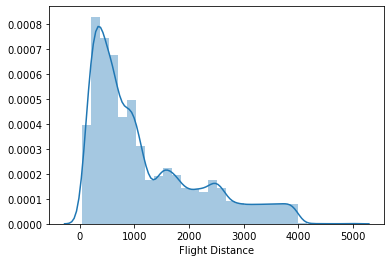

In [42]:
sns.distplot(data_train["Flight Distance"], bins=30)

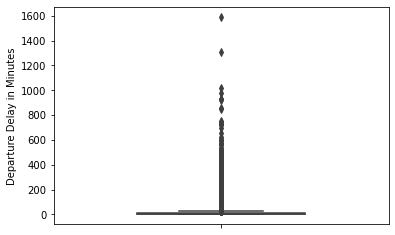

In [39]:
sns.boxplot(y=data_train['Departure Delay in Minutes'], width=0.5)

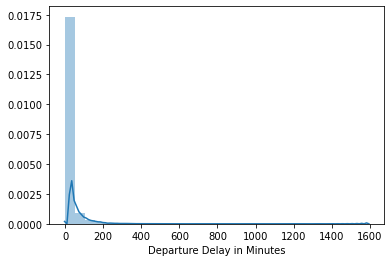

In [43]:
sns.distplot(data_train["Departure Delay in Minutes"], bins=30)

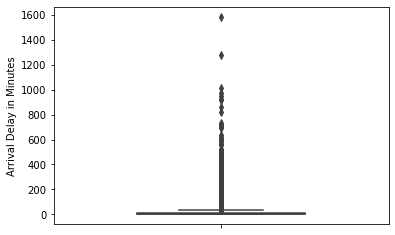

In [40]:
sns.boxplot(y=data_train['Arrival Delay in Minutes'], width=0.5)

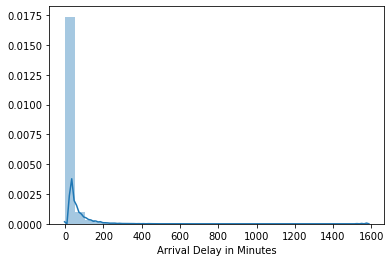

In [44]:
sns.distplot(data_train["Arrival Delay in Minutes"], bins=30)